c:\Python\Python313\Lib\site-packages\sklearn\ensemble\_iforest.py:336: UserWarning: max_samples (100) is greater than the total number of samples (10). max_samples will be set to n_samples for estimation.
  warn(


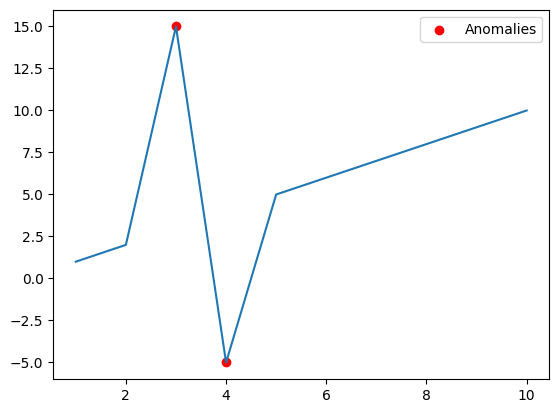

In [21]:

#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

#Create a random dataframe
data = pd.DataFrame(
    {'time': [1,2,3,4,5,6,7,8,9,10],
     'value': [1,2,15,-5,5,6,7,8,9,10]
    })

#Plot data
plt.plot(data['time'], data['value'])

#Fit the model
clf = IsolationForest(max_samples=100, random_state=50, contamination=0.2)
clf.fit(data['value'].values.reshape(-1,1))

#Create a list of anomalies
anomaly = clf.predict(data['value'].values.reshape(-1,1))

#Create a list of anomalous data points
anomaly_data = data[anomaly == -1]

#Plot anomalies
plt.scatter(anomaly_data['time'], anomaly_data['value'], color='r', label = 'Anomalies')
plt.legend()

In [22]:
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-4.1-mini",
    temperature=0.7,
    #reasoning={"effort": "medium"},
    input="""Take this data and tell me the anaomolies (just the anomolies not your working out) ''time': [1,2,3,4,5,6,7,8,9,10] 'value': [1,2,15,-5,5,6,7,8,9,10]""",
)

print(response.output_text)



The anomalies in the data are at time 3 (value 15) and time 4 (value -5).


In [24]:
import pandas as pd
df = pd.read_csv('data\TravelTime_387.csv')


<>:2: SyntaxWarning: invalid escape sequence '\T'
<>:2: SyntaxWarning: invalid escape sequence '\T'
C:\Users\rolester\AppData\Local\Temp\ipykernel_37984\2141314767.py:2: SyntaxWarning: invalid escape sequence '\T'
  df = pd.read_csv('data\TravelTime_387.csv')


,timestamp,value
269,2015-07-23 03:55:00,2858
270,2015-07-23 04:15:00,2781
271,2015-07-23 04:24:00,2891
333,2015-07-25 05:39:00,2941
334,2015-07-25 05:59:00,2848
335,2015-07-25 06:03:00,2924
428,2015-07-30 12:29:00,2003
989,2015-08-18 16:26:00,5059
1539,2015-09-01 08:06:00,1621
1540,2015-09-01 08:16:00,1680


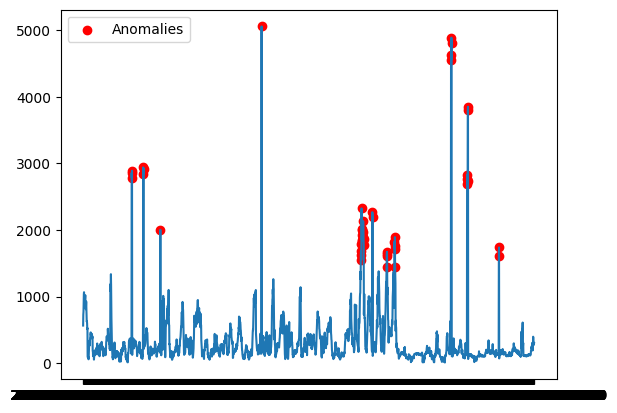

In [31]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

data = df

#Plot data
plt.plot(data['timestamp'], data['value'])

#Fit the model
clf = IsolationForest(max_samples=100, random_state=50, contamination=0.02)
clf.fit(data['value'].values.reshape(-1,1))

#Create a list of anomalies
anomaly = clf.predict(data['value'].values.reshape(-1,1))

#Create a list of anomalous data points
anomaly_data = data[anomaly == -1]

#Plot anomalies
plt.scatter(anomaly_data['timestamp'], anomaly_data['value'], color='r', label = 'Anomalies')
display(plt.legend())

anomaly_data


In [ ]:
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-4.1-mini",
    temperature=0.7,
    #reasoning={"effort": "medium"},
    input="""Take this data and tell me the anaomolies (just the anomolies not your working out) """ + df.to_json(),
)

print(response.output_text)

print(response.usage) # input_tokens=50643


Anomalies in the data:

- Index 25 to 31: Values drop sharply to very low numbers (e.g., 99, 85, 85, 87, 93, 57, 101) compared to previous high values around 500-1000.
- Index 269 to 271: Very high spikes with values 2858, 2781, 2891, much higher than surrounding values (~100-300).
- Index 333 to 335: High spikes 2941, 2848, 2924, much higher than surrounding values (~100-700).
- Index 428: Value jumps to 2003 from previous 290, and then fluctuates significantly afterward.
- Index 433: Value 117 is a sharp drop after previous 931.
- Index 448: Value drops to 207 from previous 837-965 range.
- Index 452 to 453: Large jump to 292 and then 484 from previous low values.
- Index 454 to 456: Very low values (91, 88, 91) after high 484.
- Index 489: Value 182 drops sharply from 180-190 range.
- Index 489 to 491: Sharp decrease to 90, 89, 61.
- Index 533 to 556: Sudden high spike values above 600, peaking at 919, then a sudden drop to 662 and further down.
- Index 669 to 670: Low values 85, 62

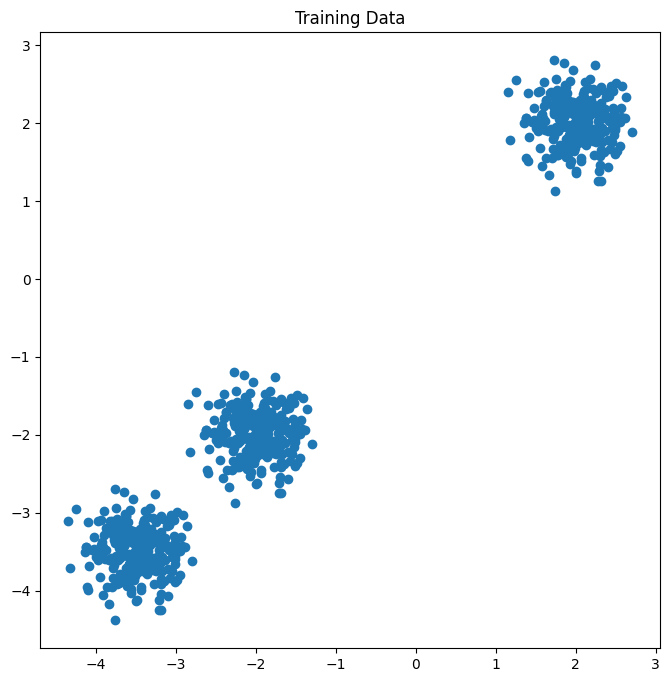

None

<Figure size 640x480 with 0 Axes>

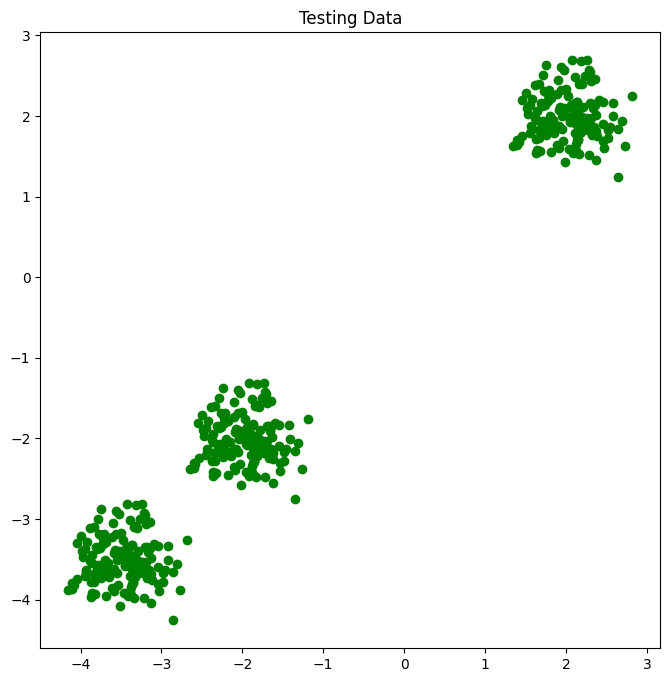

None

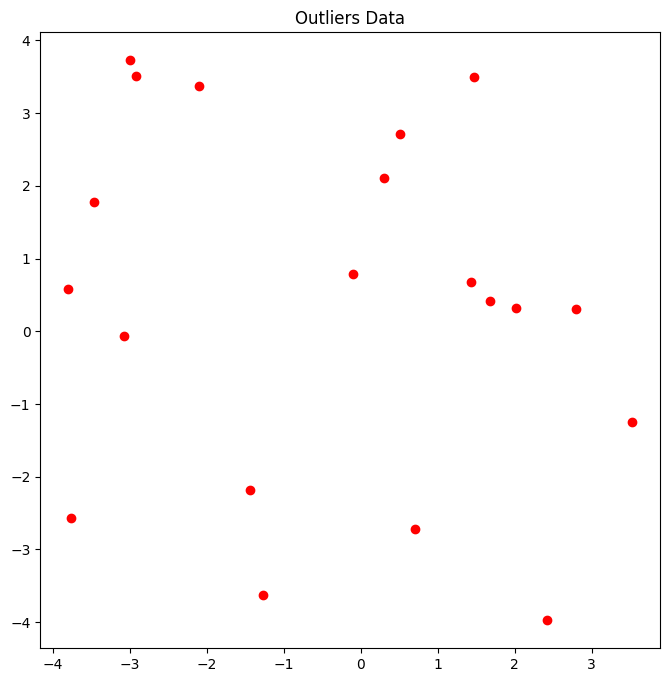

None

<Figure size 640x480 with 0 Axes>

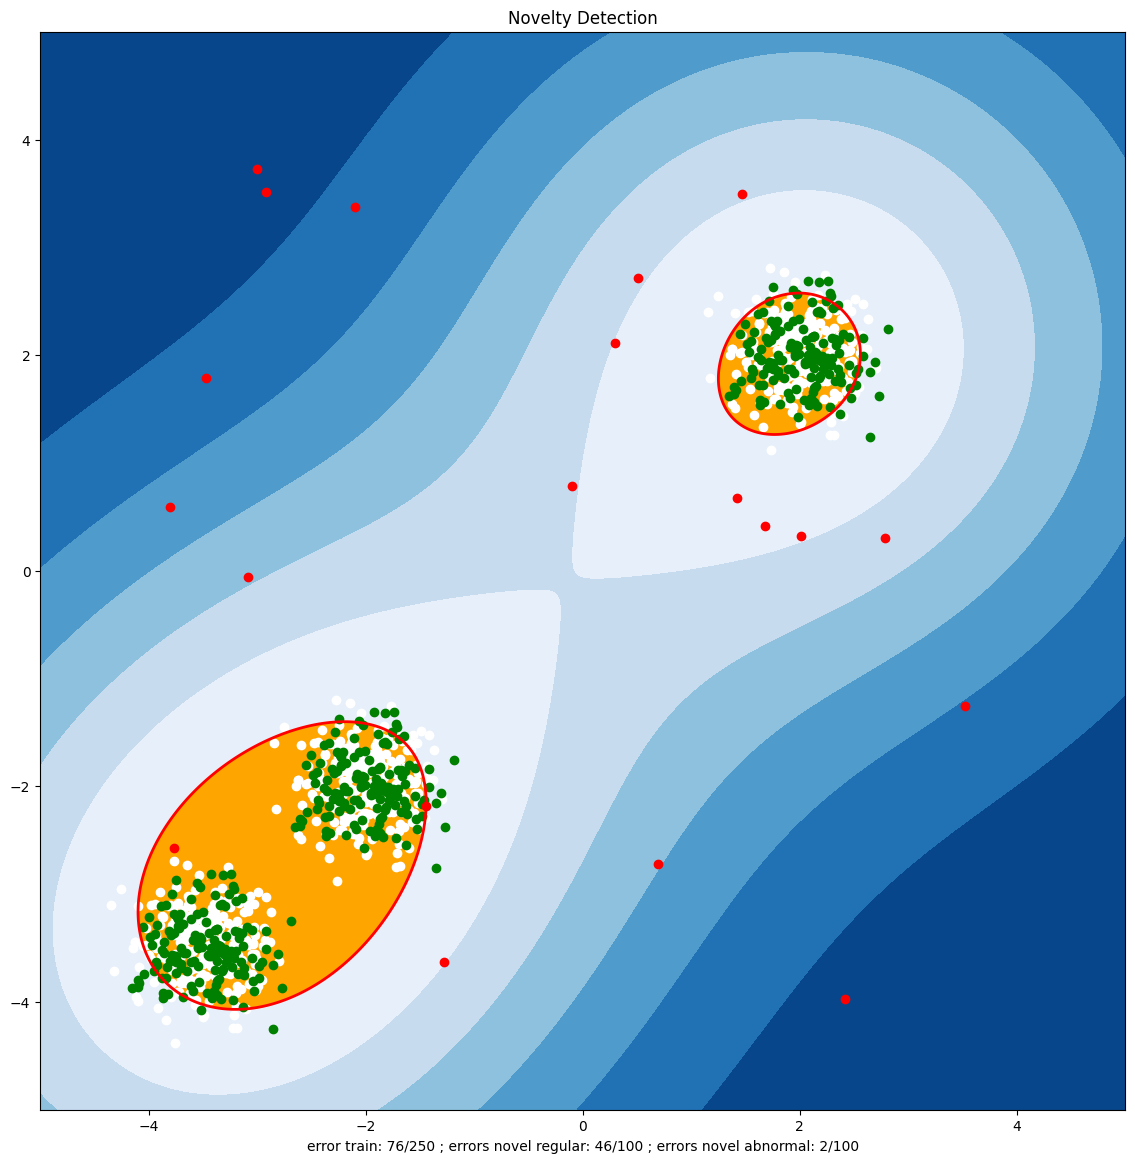

None

<Figure size 640x480 with 0 Axes>

In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager
from sklearn import svm
 
# Generate train data
X = 0.3 * np.random.randn(250, 2)
#X_train = np.r_[X + 2, X - 2]
X_train = np.r_[X + 2, X - 2, X - 3.5]
# Generate some regular novel observations
X = 0.3 * np.random.randn(150, 2)
#X_test = np.r_[X + 2, X - 2]
X_test = np.r_[X + 2, X - 2, X - 3.5]
# Generate some abnormal novel observations
X_outliers = np.random.uniform(low=-4, high=4, size=(20, 2))

#Plot Training Data
plt.figure(figsize = (8,8)) 
plt.scatter(X_train[:,0], X_train[:,1])
plt.title("Training Data")
dispA = plt.show()
display(dispA)
plt.clf()

#Plot Testing Data
plt.figure(figsize = (8,8)) 
plt.scatter(X_test[:,0], X_test[:,1], color="green")
plt.title("Testing Data")
dispA = plt.show()
display(dispA)
#plt.clf()

#Plot Outliers
plt.figure(figsize = (8,8)) 
plt.scatter(X_outliers[:,0], X_outliers[:,1], color="red")
plt.title("Outliers Data")
dispA = plt.show()
display(dispA)
plt.clf()

# fit the model
clf = svm.OneClassSVM(nu=0.1, kernel="rbf", gamma=0.1)
clf.fit(X_train)
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)
y_pred_outliers = clf.predict(X_outliers)
n_error_train = y_pred_train[y_pred_train == -1].size
n_error_test = y_pred_test[y_pred_test == -1].size
n_error_outliers = y_pred_outliers[y_pred_outliers == 1].size

# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize = (14,14)) 
 
plt.title("Novelty Detection")
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), 0, 7), cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[0, Z.max()], colors='orange')
 
b1 = plt.scatter(X_train[:, 0], X_train[:, 1], c='white')
b2 = plt.scatter(X_test[:, 0], X_test[:, 1], c='green')
c = plt.scatter(X_outliers[:, 0], X_outliers[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
plt.xlabel(
    "error train: %d/250 ; errors novel regular: %d/100 ; "
    "errors novel abnormal: %d/100"
    % (n_error_train, n_error_test, n_error_outliers))
disp2 = plt.show()
display(disp2)
plt.clf()



In [ ]:
from openai import AzureOpenAI
from azure.identity import DefaultAzureCredential, get_bearer_token_provider
import json
#add X_train and X_test together into one array
Xcomb = np.r_[X_train, X_test]

token_provider = get_bearer_token_provider(
    DefaultAzureCredential(), "https://cognitiveservices.azure.com/.default"
)

client = AzureOpenAI(
  azure_endpoint = "https://aifsweden.openai.azure.com/", 
  azure_ad_token_provider=token_provider,
  api_version="2025-03-01-preview"
)

response = client.responses.create(
    model="gpt-4.1-mini",
    temperature=0.7,
    #reasoning={"effort": "medium"},
    input="""Take this data and tell me the anaomolies (just the anomolies not your working out) """ + json.dumps(Xcomb.tolist()),
)

print(response.output_text)

print(response.usage) # total_tokens=32803


The anomalies in the data are the points with negative coordinates and those with an absolute value significantly larger than others, indicating they differ greatly from the majority of data points. The anomalies are:

```
[-2.2697455484903646, -1.195804051408861],
[-2.22211375382077, -2.1016294502685744],
[-1.7542737791059722, -2.1873221119651096],
[-2.2600315718426374, -1.6745513895910529],
[-1.8928526814147073, -1.988857209278671],
[-1.8661151095543975, -1.822632654213121],
[-1.8323206691108485, -1.9145417232606192],
[-2.000481612036929, -2.1241099349924872],
[-2.4432590836213453, -1.588044558027878],
[-2.375283308026973, -1.7000392631640167],
[-1.7865063016309188, -2.0778104634818684],
[-1.9805904783596693, -1.8749331350252691],
[-1.9156116949427089, -1.6248701205029845],
[-2.0353448418637194, -1.7312824948484815],
[-1.5808614755241395, -1.6157416824433444],
[-1.9854361909359763, -2.098504696833953],
[-2.3976589094858562, -1.4806293688987195],
[-1.5176630950703403, -1.8770001366451

In [66]:
type(Xcomb)

numpy.ndarray

In [69]:
np.array([
	[-2.2697455484903646, -1.195804051408861],
	[-2.22211375382077, -2.1016294502685744],
	[-1.7542737791059722, -2.1873221119651096]
])

array([[-2.26974555, -1.19580405],
       [-2.22211375, -2.10162945],
       [-1.75427378, -2.18732211]])

In [70]:
anoms = np.array([
[-2.2697455484903646, -1.195804051408861],
[-2.22211375382077, -2.1016294502685744],
[-1.7542737791059722, -2.1873221119651096],
[-2.2600315718426374, -1.6745513895910529],
[-1.8928526814147073, -1.988857209278671],
[-1.8661151095543975, -1.822632654213121],
[-1.8323206691108485, -1.9145417232606192],
[-2.000481612036929, -2.1241099349924872],
[-2.4432590836213453, -1.588044558027878],
[-2.375283308026973, -1.7000392631640167],
[-1.7865063016309188, -2.0778104634818684],
[-1.9805904783596693, -1.8749331350252691],
[-1.9156116949427089, -1.6248701205029845],
[-2.0353448418637194, -1.7312824948484815],
[-1.5808614755241395, -1.6157416824433444],
[-1.9854361909359763, -2.098504696833953],
[-2.3976589094858562, -1.4806293688987195],
[-1.5176630950703403, -1.8770001366451203],
[-1.9638142188537377, -1.7403980928881742],
[-1.891881075847761, -1.9293953056225932],
[-2.0942930998504314, -1.8283428093960314],
[-1.8783427573400773, -1.7501396909611173],
[-2.5892840743287713, -2.1747314850816752],
[-2.3673634526487106, -2.444360935855178],
[-1.9901781167930348, -2.1219580931098685],
[-1.6930625947923104, -2.417766045474085],
[-2.0010287836430805, -1.8023599534536758],
[-1.953523887134233, -1.714338897726245],
[-2.178001406478471, -1.719977291811349],
[-2.036437934369118, -1.88713387158353],
[-2.026695023611204, -2.358705083045369],
[-2.08951727061593, -2.1515393022741467],
[-2.1689612096209387, -1.8245618787021438],
[-1.6667111331060804, -1.581823938951386],
[-1.367848326546051, -1.663751515513196],
[-1.5161941376972372, -2.057892954280159],
[-2.2833745102129694, -1.7869378961691271],
[-2.078061099711294, -2.3068784235569053],
[-1.736699270987025, -2.062992947656958],
[-1.6959019300597291, -2.1379756333885647],
[-2.5270543003891826, -1.8101002833648272],
[-1.6754526294227547, -2.241348474501894],
[-2.2770429921486732, -1.852863793397417],
[-1.6849974959831626, -2.3487885881298185],
[-2.6189862665763615, -2.4520051755282486],
[-1.3833548196450034, -1.9404972870372614],
[-2.1063432237243265, -1.7311278674108035],
[-1.6363252967211839, -1.8221108709752574],
[-1.8862029988338638, -1.4800259329904057],
[-1.6939432173067153, -2.534744510438573],
[-1.7502638701325133, -2.2421452094317447],
[-2.5485139249997233, -1.9809669262973684],
[-1.935177893560697, -1.7800191032347086],
[-2.1172825511416176, -2.44185108121395],
[-2.452761620621558, -2.317457885007759],
[-2.0337983067613035, -2.1246409988164165],
[-2.2962046334443804, -2.453331644227982],
[-1.6838525424786277, -2.7395720416436458],
[-1.8108980842383204, -2.1967044618830265],
[-1.806424125770779, -2.1744617799467956],
[-2.4782609036409027, -1.6022039785535402],
[-2.342734284371007, -2.102878130195923],
[-2.397775367944536, -1.7842103346310474],
[-1.6859523960358997, -1.9536390287019905],
[-2.1533922121965854, -1.928846719024238],
[-2.3805833745158824, -1.973576647556094],
[-2.1288140122319437, -1.8474748346518846],
[-1.8703334008119317, -2.0699891216666346],
[-1.640011029022575, -2.1068244358263613],
[-1.866787957283571, -1.768121935127623],
[-2.4174335572902597, -2.5540353919726124],
[-1.810726063752089, -2.1690512466020633],
[-2.7508140437805704, -1.4492849314793455],
[-1.9820840855437323, -1.8198527013301216],
[-2.125647491591606, -2.291032482551779],
[-1.7591907503291526, -2.1717102502834345],
[-2.3379731977419054, -2.663286341205379],
[-2.0086629856936926, -1.9866942118416524],
[-1.9036702630766802, -2.110256407727425],
[-2.1659245161399094, -2.009246800791426],
[-1.5075530101118906, -2.392326137255862],
[-2.4351782172890934, -1.9958734909015456],
[-1.6018237592377564, -1.929570742964829],
[-2.304707078732901, -1.6035903243518503],
[-1.6998765405048877, -2.088473800823157],
[-2.5977245429922533, -1.6133548744930137],
[-2.1009123510395353, -2.1946295638401545],
[-1.8102341945374572, -1.7016604133355768],
[-1.790771932724438, -1.5638339507264756],
[-1.5450697872138897, -2.059460902758927],
[-1.7505137627119396, -2.2082396250083756],
[-1.971906485378329, -2.0255121129127156],
[-1.6019080888579404, -2.568150635531486],
[-2.0473677359785305, -1.822173004169197],
[-1.9478562931027081, -2.140249191632242],
[-2.1798726616480772, -2.2991785279769097],
[-1.7638610805279638, -1.2529514664394115],
[-1.9176570182978334, -2.1292473561801],
[-2.087379114764002, -2.0303560527866225],
[-2.1055355448959134, -1.62076731990658],
[-2.5279271497210445, -1.9678675895676194],
[-1.5846328529216764, -1.969898467354923],
[-2.039347631409437, -1.3180793690139359],
[-2.06977327826551, -2.531538260982669],
[-2.2008325442521874, -2.3276708682474014],
[-2.082216271359996, -1.7576022479818967],
[-2.2783530840640784, -2.172253810787776],
[-1.59942823723685, -2.2160720862122814],
[-1.9061790628619504, -1.9600329369856702],
[-2.178686051021115, -1.8577226331859011],
[-1.538599968949128, -1.9521634224338464],
[-1.7148414567934207, -1.8956088456323585],
[-1.9897426767439612, -2.260410289892815],
[-2.1441496575856207, -1.851223073838519],
[-2.315984612800708, -2.0828202294926337],
[-2.1575053475773687, -1.7280400659082438],
[-1.7860359856961168, -2.2357271218317667],
[-1.9135827515150856, -1.8678088368689183],
[-2.1510827475592573, -2.3257977296146723],
[-2.4229213696268084, -1.9659229492383958],
[-2.13420200253377, -2.028238141323057],
[-1.5303861169576916, -1.5950125278183553],
[-1.7197168140318038, -1.9762486701977222],
[-1.86905840614837, -2.146694248150546],
[-1.6195841769093338, -1.662308461912054],
[-1.9364272164268574, -2.4510930926717025],
[-2.324433414811054, -1.610306331320118],
[-1.54216187510086, -1.9654958388912773],
[-2.119843203862501, -2.414413183873992],
[-1.711308495463735, -2.6179738057366255],
[-1.8270982595443668, -1.440930570651773],
[-2.128124733335152, -1.542896546480999],
[-2.147351945492513, -2.2862331262901288],
[-2.1466066550747853, -1.2277937133639334],
[-1.89167093519062, -2.2628990781520173],
[-2.3699068420975453, -1.7122754461150085],
[-2.3835894510256925, -2.0852130951956136],
[-2.623641320152956, -1.941681776855289],
[-2.080977556671751, -1.7195343058738901],
[-1.5502216228778614, -2.2454377318803314],
[-1.4502989537421334, -2.2963180734324076],
[-2.245705519378536, -1.432121083236193],
[-1.752873417361846, -1.8689000807128975],
[-1.9714902631150466, -2.254946580193147],
[-1.9460696265976123, -2.080921566438038],
[-2.009437672968608, -2.24392155163691],
[-2.2012122015130404, -2.2837534484073614],
[-1.51290022118235, -2.09599449352114],
[-1.941374208534753, -2.4888652784619496],
[-1.9403735117417418, -1.9673308894457864],
[-2.241588889423812, -1.8294611895269064],
[-1.5757199396981123, -2.3346308396016258],
[-1.6548151791039807, -1.879007643939207],
[-2.1369085897228763, -1.5978126960829453],
[-1.8665108199412914, -2.2773724006794938],
[-1.8145224946220624, -1.888597365359575],
[-2.0301429085952245, -2.2645536213643642],
[-1.928280070873108, -2.1629294471600056],
[-1.8915130572807006, -1.6605242596746312],
[-2.0522894454732628, -1.7346550076338179],
[-1.4932247170647714, -1.4830400164585331],
[-1.6453285876782213, -2.3769553807344663],
[-2.2433029898308026, -1.8680324068867225],
[-2.112900941275774, -1.690770236218848],
[-1.8940352905950455, -2.0764524934763293],
[-1.4168654242919212, -1.525114124820552],
[-2.644891946395834, -1.9986665204188558],
[-1.8500192880103121, -1.9879485820247846],
[-1.5612012399917434, -1.5214680245395769],
[-1.8820203103068054, -2.214777497092222],
[-2.0753365606374947, -1.4628060628830148],
[-1.7691378821492874, -1.7690936385175557],
[-2.117714729422768, -2.053514240759083],
[-1.8736844448299248, -1.9773774483079034],
[-2.2597876983698466, -2.8771362140505725],
[-1.684044559832299, -1.537603450627634],
[-1.8716649368594718, -1.7131642334837212],
[-1.852213997723974, -1.5538178501811906],
[-2.427193257989975, -1.8785003324718732],
[-2.2881997828492087, -2.328904812327303],
[-2.1295637967281724, -1.534805626514687],
[-2.2332690333466476, -1.5788548948996737],
[-1.679626313830287, -2.0997947218289292],
[-1.9416056008744476, -2.088246472177348],
[-1.531823140329164, -1.801567554368186],
[-2.0006868000163482, -2.0695637924866817],
[-2.2530529982518095, -2.0568577464026028],
[-2.178344111600166, -1.6467243603330706],
[-1.8993799336295092, -1.5886717076384624],
[-1.7944114142480148, -2.1563975093727583],
[-2.4410091717337656, -1.9077362085126335],
[-2.495805624444129, -2.067221468460766],
[-1.7736824371073283, -2.4073497858663613],
[-2.4740065830517537, -2.106319054749414],
[-2.2108104114235445, -1.9487016565904425],
[-1.9816486311252965, -2.0001295230301164],
[-2.088832005751498, -1.7472265569298346],
[-1.446883100982642, -1.9824320038575387],
[-2.190210325634998, -2.055412689711194],
[-2.8466909355914622, -1.5985053330884385],
[-2.059231358615356, -2.183370209469989],
[-1.4880606263944225, -2.3548148275603986],
[-2.626796755919126, -1.9405386819035215],
[-2.2343801823478056, -1.8686864768757228],
[-1.9916782878257069, -2.6180791289984704],
[-2.216902406125731, -2.4054669766883854],
[-2.1355219708350752, -1.8252431200392834],
[-2.1824298198941987, -1.711173545837849],
[-2.2862961288887442, -2.2017238378273944],
[-1.5871194662807508, -1.6041828353918928],
[-1.8386593345424642, -1.8073932048184456],
[-1.519254990804604, -2.152636493805978],
[-2.244751278629732, -1.7563905174865644],
[-1.9345467179931064, -2.098966474423091],
[-1.67515347444087, -2.0609146222543893],
[-1.9979936417422202, -2.635573110883438],
[-2.0625864843632504, -2.481349302079546],
[-2.256432687295268, -1.7389084605931553],
[-1.720754728680264, -1.810556441046471],
[-1.747467445110165, -1.6212532537857285],
[-2.1383342459228594, -1.516650986703108],
[-2.1334870774915333, -1.9013473085995558],
[-2.4123142308791348, -1.9388277908458436],
[-2.2671542136654805, -1.6145263098313813],
[-2.125298762469866, -2.2111130131784726],
[-2.153382272629959, -1.7820751589234098],
[-1.6825895516701108, -1.7486739839230845],
[-2.237619494973732, -2.4067763994319504],
[-1.9453170229314867, -1.7033469218416963],
[-1.296825379783788, -2.121192735827891],
[-2.016331982944662, -2.315043970002902],
[-2.087594871747058, -2.166171715503516],
[-1.703720227307135, -2.1396422464787537],
[-1.9069487246718888, -1.7373266722106862],
[-1.9464834221698304, -2.1324980723168694],
[-2.1862880230397317, -1.9988988498324647],
[-2.1008899004518113, -2.39729940354404],
[-2.5968516727210837, -2.492473575939105],
[-1.8138345558612252, -2.139790513987723],
[-2.821820589321163, -2.21293790570801],
[-1.9677023009397232, -1.8419225577365848],
[-1.5854915967315832, -1.6589850825498964],
[-2.2047489384806935, -2.072253955745779],
[-1.9479499817348673, -1.8412583116050483],
[-1.7427687233558968, -2.21761898126677],
[-1.4366321811530263, -1.8140967253565243],
[-1.4306346684530027, -1.924661233561895],
[-1.7175942387089895, -2.7453609168986226],
[-1.9956926366636047, -2.1496291284941287],
[-2.2678218346064143, -1.8801030185949903],
[-3.7697455484903646, -2.695804051408861],
[-3.72211375382077, -3.6016294502685744],
[-3.254273779105972, -3.6873221119651096],
[-3.7600315718426374, -3.174551389591053],
[-3.3928526814147073, -3.4888572092786707],
[-3.3661151095543973, -3.322632654213121],
[-3.3323206691108487, -3.414541723260619],
[-3.500481612036929, -3.6241099349924872],
[-3.9432590836213453, -3.088044558027878],
[-3.875283308026973, -3.2000392631640167],
[-3.2865063016309186, -3.5778104634818684],
[-3.4805904783596695, -3.374933135025269],
[-3.415611694942709, -3.1248701205029845],
[-3.5353448418637194, -3.2312824948484815],
[-3.0808614755241392, -3.1157416824433444],
[-3.4854361909359763, -3.598504696833953],
[-3.8976589094858562, -2.9806293688987195],
[-3.0176630950703403, -3.3770001366451203],
[-3.4638142188537375, -3.2403980928881744],
[-3.391881075847761, -3.429395305622593],
[-3.5942930998504314, -3.3283428093960317],
[-3.3783427573400773, -3.2501396909611175],
[-4.089284074328772, -3.6747314850816752],
[-3.8673634526487106, -3.944360935855178],
[-3.490178116793035, -3.6219580931098685],
[-3.1930625947923104, -3.917766045474085],
[-3.5010287836430805, -3.302359953453676],
[-3.4535238871342333, -3.214338897726245],
[-3.678001406478471, -3.219977291811349],
[-3.536437934369118, -3.38713387158353],
[-3.526695023611204, -3.858705083045369],
[-3.58951727061593, -3.6515393022741467],
[-3.6689612096209387, -3.324561878702144],
[-3.16671113310608, -3.081823938951386],
[-2.867848326546051, -3.163751515513196],
[-3.016194137697237, -3.557892954280159],
[-3.7833745102129694, -3.286937896169127],
[-3.578061099711294, -3.8068784235569053],
[-3.236699270987025, -3.562992947656958],
[-3.195901930059729, -3.6379756333885647],
[-4.0270543003891826, -3.3101002833648274],
[-3.1754526294227547, -3.741348474501894],
[-3.7770429921486732, -3.3528637933974172],
[-3.1849974959831626, -3.8487885881298185],
[-4.1189862665763615, -3.9520051755282486],
[-2.883354819645003, -3.4404972870372617],
[-3.6063432237243265, -3.2311278674108035],
[-3.136325296721184, -3.3221108709752576],
[-3.3862029988338636, -2.9800259329904057],
[-3.1939432173067153, -4.034744510438573],
[-3.2502638701325135, -3.7421452094317447],
[-4.048513924999723, -3.480966926297368],
[-3.435177893560697, -3.2800191032347086],
[-3.6172825511416176, -3.94185108121395],
[-3.952761620621558, -3.817457885007759],
[-3.5337983067613035, -3.6246409988164165],
[-3.7962046334443804, -3.953331644227982],
[-3.1838525424786277, -4.239572041643646],
[-3.31089808423832, -3.6967044618830265],
[-3.306424125770779, -3.6744617799467956],
[-3.9782609036409027, -3.1022039785535402],
[-3.842734284371007, -3.602878130195923],
[-3.897775367944536, -3.2842103346310476],
[-3.1859523960359, -3.4536390287019905],
[-3.6533922121965854, -3.428846719024238],
[-3.8805833745158824, -3.473576647556094],
[-3.6288140122319437, -3.3474748346518846],
[-3.3703334008119317, -3.5699891216666346],
[-3.140011029022575, -3.6068244358263613],
[-3.366787957283571, -3.2681219351276227],
[-3.9174335572902597, -4.054035391972612],
[-3.3107260637520888, -3.6690512466020633],
[-4.25081404378057, -2.9492849314793457],
[-3.4820840855437325, -3.3198527013301216],
[-3.625647491591606, -3.791032482551779],
[-3.259190750329153, -3.6717102502834345],
[-3.8379731977419054, -4.163286341205379],
[-3.5086629856936926, -3.486694211841652],
[-3.40367026307668, -3.610256407727425],
[-3.6659245161399094, -3.509246800791426],
[-3.0075530101118906, -3.892326137255862],
[-3.9351782172890934, -3.4958734909015456],
[-3.1018237592377567, -3.4295707429648288],
[-3.804707078732901, -3.1035903243518503],
[-3.1998765405048877, -3.588473800823157],
[-4.097724542992253, -3.1133548744930137],
[-3.6009123510395353, -3.6946295638401545],
[-3.310234194537457, -3.201660413335577],
[-3.290771932724438, -3.0638339507264756],
[-3.04506978721389, -3.559460902758927],
[-3.2505137627119396, -3.7082396250083756],
[-3.471906485378329, -3.5255121129127156],
[-3.1019080888579404, -4.068150635531485],
[-3.5473677359785305, -3.3221730041691973],
[-3.447856293102708, -3.640249191632242],
[-3.6798726616480772, -3.7991785279769097],
[-3.2638610805279638, -2.7529514664394115],
[-3.417657018297833, -3.6292473561801],
[-3.587379114764002, -3.5303560527866225],
[-3.6055355448959134, -3.12076731990658],
[-4.0279271497210445, -3.467867589567619],
[-3.0846328529216764, -3.469898467354923],
[-3.539347631409437, -2.818079369013936],
[-3.56977327826551, -4.0315382609826695],
[-3.7008325442521874, -3.8276708682474014],
[-3.582216271359996, -3.2576022479818967],
[-3.7783530840640784, -3.672253810787776],
[-3.0994282372368502, -3.7160720862122814],
[-3.4061790628619506, -3.46003293698567],
[-3.678686051021115, -3.357722633185901],
[-3.038599968949128, -3.4521634224338467],
[-3.2148414567934207, -3.3956088456323585],
[-3.489742676743961, -3.760410289892815],
[-3.6441496575856207, -3.351223073838519],
[-3.815984612800708, -3.5828202294926337],
[-3.6575053475773687, -3.2280400659082438],
[-3.2860359856961168, -3.7357271218317667],
[-3.4135827515150856, -3.3678088368689183],
[-3.6510827475592573, -3.8257977296146723],
[-3.9229213696268084, -3.465922949238396],
[-3.63420200253377, -3.528238141323057],
[-3.0303861169576916, -3.0950125278183553],
[-3.2197168140318038, -3.476248670197722],
[-3.36905840614837, -3.646694248150546],
[-3.1195841769093335, -3.1623084619120543],
[-3.4364272164268574, -3.9510930926717025],
[-3.824433414811054, -3.110306331320118],
[-3.04216187510086, -3.4654958388912775],
[-3.619843203862501, -3.914413183873992],
[-3.2113084954637348, -4.117973805736625],
[-3.3270982595443668, -2.9409305706517728],
[-3.628124733335152, -3.042896546480999],
[-3.647351945492513, -3.7862331262901288],
[-3.6466066550747853, -2.7277937133639334],
[-3.39167093519062, -3.7628990781520173],
[-3.8699068420975453, -3.2122754461150085],
[-3.8835894510256925, -3.5852130951956136],
[-4.123641320152956, -3.441681776855289],
[-3.580977556671751, -3.21953430587389],
[-3.0502216228778614, -3.7454377318803314],
[-2.9502989537421334, -3.7963180734324076],
[-3.745705519378536, -2.932121083236193],
[-3.252873417361846, -3.3689000807128977],
[-3.4714902631150464, -3.754946580193147],
[-3.4460696265976125, -3.580921566438038],
[-3.509437672968608, -3.74392155163691],
[-3.7012122015130404, -3.7837534484073614],
[-3.01290022118235, -3.59599449352114],
[-3.441374208534753, -3.9888652784619496],
[-3.4403735117417416, -3.4673308894457864],
[-3.741588889423812, -3.3294611895269064],
[-3.075719939698112, -3.8346308396016258],
[-3.1548151791039807, -3.379007643939207],
[-3.6369085897228763, -3.0978126960829453],
[-3.366510819941291, -3.7773724006794938],
[-3.3145224946220626, -3.388597365359575],
[-3.5301429085952245, -3.7645536213643642],
[-3.428280070873108, -3.6629294471600056],
[-3.3915130572807004, -3.1605242596746312],
[-3.5522894454732628, -3.2346550076338176],
[-2.9932247170647717, -2.983040016458533],
[-3.1453285876782213, -3.8769553807344663],
[-3.7433029898308026, -3.3680324068867225],
[-3.612900941275774, -3.190770236218848],
[-3.3940352905950455, -3.5764524934763293],
[-2.916865424291921, -3.025114124820552],
[-4.144891946395834, -3.4986665204188556],
[-3.350019288010312, -3.4879485820247846],
[-3.0612012399917434, -3.021468024539577],
[-3.3820203103068054, -3.714777497092222],
[-3.5753365606374947, -2.962806062883015],
[-3.2691378821492876, -3.269093638517556],
[-3.617714729422768, -3.553514240759083],
[-3.373684444829925, -3.4773774483079034],
[-3.7597876983698466, -4.377136214050573],
[-3.184044559832299, -3.0376034506276337],
[-3.3716649368594718, -3.213164233483721],
[-3.352213997723974, -3.053817850181191],
[-3.927193257989975, -3.378500332471873],
[-3.7881997828492087, -3.828904812327303],
[-3.6295637967281724, -3.0348056265146868],
[-3.7332690333466476, -3.0788548948996737],
[-3.179626313830287, -3.5997947218289292],
[-3.4416056008744476, -3.588246472177348],
[-3.031823140329164, -3.301567554368186],
[-3.5006868000163482, -3.5695637924866817],
[-3.7530529982518095, -3.5568577464026028],
[-3.678344111600166, -3.1467243603330703],
[-3.3993799336295094, -3.088671707638462],
[-3.2944114142480148, -3.6563975093727583],
[-3.9410091717337656, -3.4077362085126333],
[-3.995805624444129, -3.567221468460766],
[-3.273682437107328, -3.9073497858663613],
[-3.9740065830517537, -3.606319054749414],
[-3.7108104114235445, -3.4487016565904427],
[-3.4816486311252968, -3.5001295230301164],
[-3.588832005751498, -3.2472265569298346],
[-2.946883100982642, -3.482432003857539],
[-3.690210325634998, -3.555412689711194],
[-4.346690935591462, -3.0985053330884385],
[-3.559231358615356, -3.683370209469989],
[-2.9880606263944225, -3.8548148275603986],
[-4.126796755919126, -3.4405386819035213],
[-3.7343801823478056, -3.3686864768757228],
[-3.491678287825707, -4.11807912899847],
[-3.716902406125731, -3.9054669766883854],
[-3.6355219708350752, -3.3252431200392834],
[-3.6824298198941987, -3.211173545837849],
[-3.7862961288887442, -3.7017238378273944],
[-3.087119466280751, -3.1041828353918928],
[-3.338659334542464, -3.3073932048184456],
[-3.0192549908046042, -3.652636493805978],
[-3.744751278629732, -3.2563905174865644],
[-3.4345467179931064, -3.598966474423091],
[-3.17515347444087, -3.5609146222543893],
[-3.4979936417422204, -4.1355731108834375],
[-3.5625864843632504, -3.981349302079546],
[-3.756432687295268, -3.238908460593155],
[-3.220754728680264, -3.310556441046471],
[-3.247467445110165, -3.1212532537857287],
[-3.6383342459228594, -3.016650986703108],
[-3.6334870774915333, -3.401347308599556],
[-3.9123142308791348, -3.4388277908458433],
[-3.7671542136654805, -3.1145263098313816],
[-3.625298762469866, -3.7111130131784726],
[-3.653382272629959, -3.28207515892341],
[-3.1825895516701106, -3.2486739839230845],
[-3.737619494973732, -3.9067763994319504],
[-3.4453170229314867, -3.203346921841696],
[-2.796825379783788, -3.621192735827891],
[-3.516331982944662, -3.815043970002902],
[-3.587594871747058, -3.666171715503516],
[-3.203720227307135, -3.6396422464787537],
[-3.406948724671889, -3.237326672210686],
[-3.4464834221698304, -3.6324980723168694],
[-3.6862880230397317, -3.4988988498324645],
[-3.6008899004518113, -3.89729940354404],
[-4.096851672721084, -3.992473575939105],
[-3.3138345558612254, -3.639790513987723],
[-4.321820589321163, -3.71293790570801],
[-3.4677023009397234, -3.3419225577365848],
[-3.0854915967315835, -3.1589850825498966],
[-3.7047489384806935, -3.572253955745779],
[-3.4479499817348676, -3.3412583116050483],
[-3.242768723355897, -3.71761898126677],
[-2.9366321811530263, -3.3140967253565243],
[-2.9306346684530027, -3.4246612335618947],
[-3.2175942387089895, -4.245360916898623],
[-3.4956926366636045, -3.6496291284941287],
[-3.7678218346064143, -3.3801030185949905]])

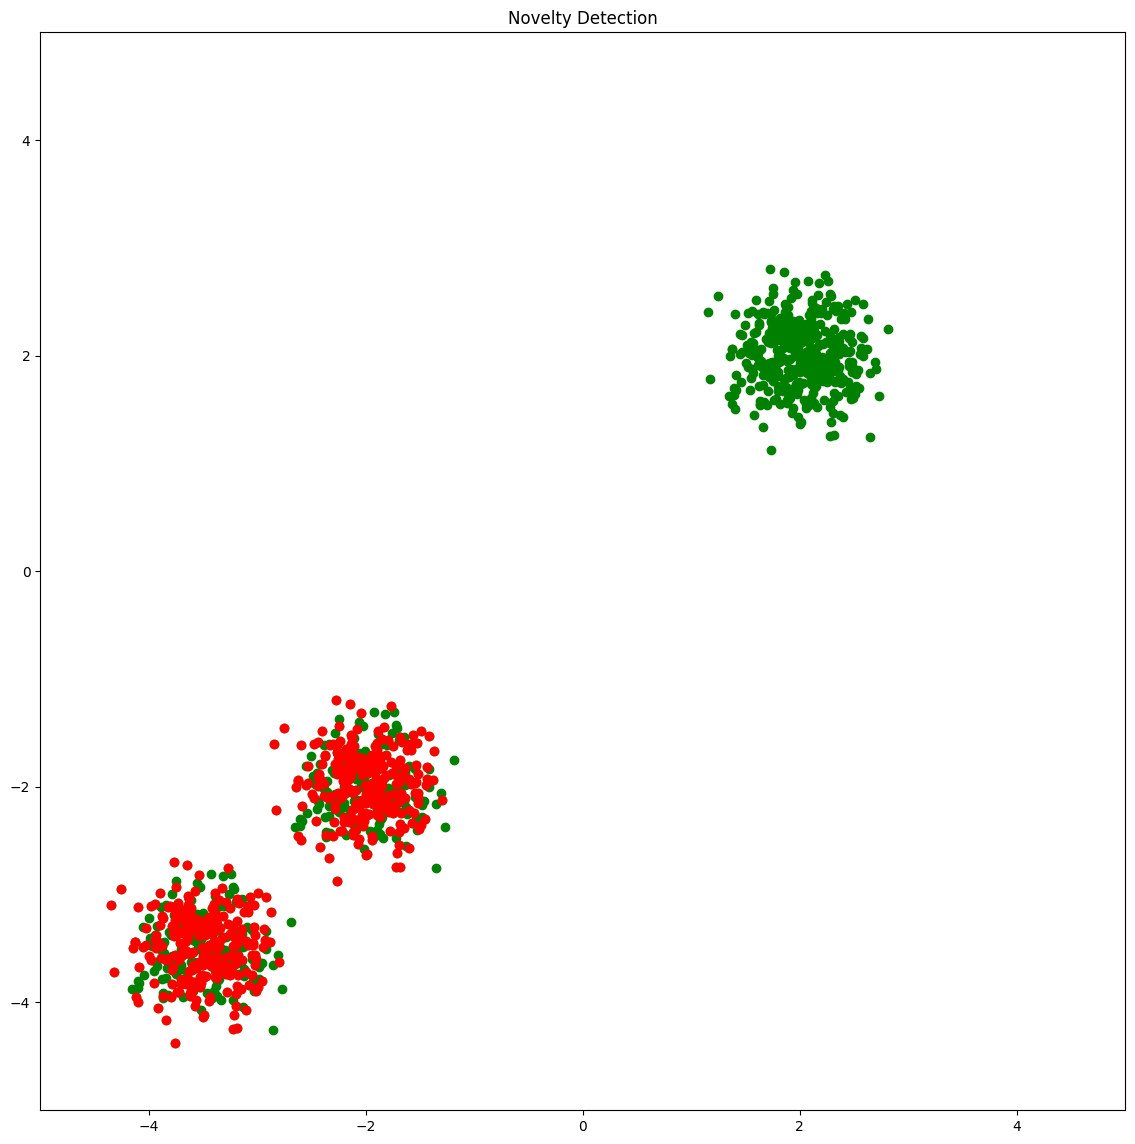

None

<Figure size 640x480 with 0 Axes>

In [72]:

# plot the line, the points, and the nearest vectors to the plane
xx, yy = np.meshgrid(np.linspace(-5, 5, 500), np.linspace(-5, 5, 500))

plt.figure(figsize = (14,14)) 
plt.title("Novelty Detection")

b1 = plt.scatter(Xcomb[:, 0], Xcomb[:, 1], c='green')
#b1 = plt.scatter(X_test[:, 0], X_test[:, 1], c='blue')
c = plt.scatter(anoms[:, 0], anoms[:, 1], c='red')
plt.axis('tight')
plt.xlim((-5, 5))
plt.ylim((-5, 5))
# plt.xlabel(
#     "error train: %d/250 ; errors novel regular: %d/100 ; "
#     "errors novel abnormal: %d/100"
#     % (n_error_train, n_error_test, n_error_outliers))
disp2 = plt.show()
display(disp2)
plt.clf()
